## Data Source:

[Population data](https://redistrictingdatahub.org/dataset/virginia-block-pl-94171-2020/): based on the decennial census at the Census Block level on 2020 Census Redistricting Data

[2020 County data](https://redistrictingdatahub.org/dataset/virginia-county-pl-94171-2020/): from 2020 Census Redistricting Data (P.L. 94-171) Shapefiles

[State Senate District data](https://redistrictingdatahub.org/dataset/2021-senate-of-virginia-districts-approved-plan/): 2021 State Senate Approved Plan

[2020 election data](https://redistrictingdatahub.org/dataset/vest-2020-virginia-precinct-boundaries-and-election-results-shapefile/)**:**  VEST 2020 Virginia precinct and election results

In [1]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os

maup.progress.enabled = True

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
maup.progress.enabled = True

In [4]:
start_time = time.time()
population_df = gpd.read_file("./va_pl2020_b/va_pl2020_b.shp")
end_time = time.time()
print("The time to import va_pl2020_p2_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import va_pl2020_p2_b.shp is: 3.935054365793864 mins


In [5]:
start_time = time.time()
vest20_df = gpd.read_file("./VA Vest 20/va_vest_20.shp")
end_time = time.time()
print("The time to import va_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import va_vest_20.shp is: 0.0696080207824707 mins


In [6]:
start_time = time.time()
county_df = gpd.read_file("./VA 2020 County Data/va_pl2020_cnty.shp")
end_time = time.time()
print("The time to import va_pl2020_cnty.shp is:",
      (end_time-start_time)/60, "mins")

The time to import va_pl2020_cnty.shp is: 0.02003743251164754 mins


In [7]:
start_time = time.time()
sen_df = gpd.read_file("./Adopted VA SLDU 2021/SCV FINAL SD.shp")
end_time = time.time()
print("The time to import state senate districts is:",
      (end_time-start_time)/60, "mins")

The time to import state senate districts is: 0.01159366766611735 mins


In [8]:
sen_df.shape

(40, 4)

In [9]:
print(list(population_df.columns))

['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLOCKCE20', 'GEOID20', 'NAME20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'FILEID', 'STUSAB', 'SUMLEV', 'GEOVAR', 'GEOCOMP', 'CHARITER', 'LOGRECNO', 'GEOID', 'GEOCODE', 'REGION', 'DIVISION', 'STATE', 'STATENS', 'COUNTY', 'COUNTYCC', 'COUNTYNS', 'COUSUB', 'COUSUBCC', 'COUSUBNS', 'CONCIT', 'CONCITCC', 'CONCITNS', 'PLACE', 'PLACECC', 'PLACENS', 'TRACT', 'BLKGRP', 'BLOCK', 'AIANHH', 'AIHHTLI', 'AIANHHFP', 'AIANHHCC', 'AIANHHNS', 'AITS', 'AITSFP', 'AITSCC', 'AITSNS', 'TTRACT', 'TBLKGRP', 'ANRC', 'ANRCCC', 'ANRCNS', 'CBSA', 'MEMI', 'CSA', 'METDIV', 'NECTA', 'NMEMI', 'CNECTA', 'NECTADIV', 'CBSAPCI', 'NECTAPCI', 'CD116', 'SLDU18', 'SLDL18', 'VTD', 'VTDI', 'SDELM', 'SDSEC', 'SDUNI', 'AREALAND', 'AREAWATR', 'BASENAME', 'NAME', 'FUNCSTAT', 'POP100', 'HU100', 'INTPTLAT', 'INTPTLON', 'LSADC', 'UGA', 'P0010001', 'P0010002', 'P0010003', 'P0010004', 'P0010005', 'P0010006', 'P0010007', 'P0010008', 'P0010009', 'P0010010', 'P001

In [10]:
print(vest20_df.columns)

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'G20PREDBID', 'G20PRERTRU',
       'G20PRELJOR', 'G20PREOWRI', 'G20USSDWAR', 'G20USSRGAD', 'G20USSOWRI',
       'geometry'],
      dtype='object')


In [11]:
print(list(county_df.columns))

['STATEFP20', 'COUNTYFP20', 'COUNTYNS20', 'GEOID20', 'NAME20', 'NAMELSAD20', 'LSAD20', 'CLASSFP20', 'MTFCC20', 'CSAFP20', 'CBSAFP20', 'METDIVFP20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'FILEID', 'STUSAB', 'SUMLEV', 'GEOVAR', 'GEOCOMP', 'CHARITER', 'LOGRECNO', 'GEOID', 'GEOCODE', 'REGION', 'DIVISION', 'STATE', 'STATENS', 'COUNTY', 'COUNTYCC', 'COUNTYNS', 'CBSA', 'MEMI', 'CSA', 'METDIV', 'AREALAND', 'AREAWATR', 'BASENAME', 'NAME', 'FUNCSTAT', 'POP100', 'HU100', 'INTPTLAT', 'INTPTLON', 'LSADC', 'P0010001', 'P0010002', 'P0010003', 'P0010004', 'P0010005', 'P0010006', 'P0010007', 'P0010008', 'P0010009', 'P0010010', 'P0010011', 'P0010012', 'P0010013', 'P0010014', 'P0010015', 'P0010016', 'P0010017', 'P0010018', 'P0010019', 'P0010020', 'P0010021', 'P0010022', 'P0010023', 'P0010024', 'P0010025', 'P0010026', 'P0010027', 'P0010028', 'P0010029', 'P0010030', 'P0010031', 'P0010032', 'P0010033', 'P0010034', 'P0010035', 'P0010036', 'P0010037', 'P0010038', 'P0010039', 'P00100

In [12]:
print(sen_df.columns)

Index(['ID', 'DISTRICT', 'DISTRICTN', 'geometry'], dtype='object')


In [13]:
print(sen_df.head())

   ID DISTRICT  DISTRICTN                                           geometry
0   1        1          1  POLYGON ((-78.64177 38.60472, -78.64941 38.610...
1   2        2          2  POLYGON ((-79.72027 37.86768, -79.72046 37.867...
2   3        3          3  POLYGON ((-80.20312 37.24487, -80.20325 37.245...
3   4        4          4  POLYGON ((-80.41273 37.02407, -80.41271 37.024...
4   5        5          5  POLYGON ((-81.62818 36.65158, -81.63004 36.655...


## Columns for Census Data

In [14]:
district_col_name = "DISTRICT"

## Clean the Data

In [15]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
sen_df = sen_df.to_crs(sen_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())

In [16]:
maup.doctor(population_df)

100%|██████████████████████████████████| 163491/163491 [03:00<00:00, 904.49it/s]


True

In [17]:
maup.doctor(county_df)

100%|████████████████████████████████████████| 133/133 [00:01<00:00, 116.81it/s]


True

In [18]:
maup.doctor(sen_df)

100%|███████████████████████████████████████████| 40/40 [00:00<00:00, 57.13it/s]


True

In [19]:
maup.doctor(vest20_df)

100%|██████████████████████████████████████| 2477/2477 [00:06<00:00, 372.16it/s]


There are 82 overlaps.
There are 553 holes.


False

## We need to do smart repair with our 2020 election data

In [20]:
final_df = smart_repair(vest20_df, nest_within_regions = county_df)

100%|████████████████████████████████████████| 133/133 [00:01<00:00, 110.69it/s]


Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


100%|████████████████████████████████████████| 133/133 [00:00<00:00, 288.00it/s]


Identifying overlaps...


100%|██████████████████████████████████████| 2786/2786 [00:05<00:00, 528.64it/s]


Resolving overlaps and filling gaps...


100%|████████████████████████████████████████| 133/133 [00:00<00:00, 272.11it/s]
Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 2: 100%|███████████████| 2/2 [00:02<00:00,  1.09s/it]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 3: 100%|███████████████| 1/1 [00:00<00:00, 27.60it/s]


Found a component of the region at index 3 that does not intersect any geometry assigned to that region.


Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 4: 100%|███████████████| 1/1 [00:00<00:00, 46.38it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 7: 100%|███████████████| 1/1 [00:00<00:00, 59.72it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 9: 100%|███████████████| 1/1 [00:00<00:00, 27.81it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 10: 100%|██████████████| 3/3 [00:00<00:00, 35.11it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 13: 100%|██████████████| 1/1 [00:00<00:00, 50.24it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to simplify in region 14: 100%|███████████

In [21]:
import copy
boundaries = copy.deepcopy(final_df)
boundaries["geometry"] = boundaries.geometry.boundary  # get boundaries
neighbors = gpd.sjoin(boundaries, final_df, predicate="intersects") # find boundaries that intersect
neighbors = neighbors[neighbors.index != neighbors.index_right] # remove boundaries of a region with itself

# compute shared border length using intersection
borders = list(neighbors.apply(
    lambda row: row.geometry.intersection(boundaries.loc[row.index_right, "geometry"]).length, axis=1
))

borders.sort()
print(borders[:1000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [22]:
# Alternative approach to find neighbors and shared border lengths
neighbors_list = []

# Loop through each polygon
for idx1, row1 in final_df.iterrows():
    geom1 = row1.geometry
    
    # Find all polygons that touch this one
    for idx2, row2 in final_df.iterrows():
        if idx1 != idx2:  # Skip self
            geom2 = row2.geometry
            
            # Check if they share a border
            if geom1.touches(geom2):
                # Calculate the shared boundary length
                shared_boundary = geom1.boundary.intersection(geom2.boundary)
                length = shared_boundary.length
                
                if length > 0:
                    neighbors_list.append((idx1, idx2, length))

# Convert to DataFrame
neighbor_df = pd.DataFrame(neighbors_list, columns=["source", "target", "border_length"])
print(f"Found {len(neighbor_df)} shared borders")

# Sort and print border lengths
border_lengths = sorted(neighbor_df.border_length.tolist())
print(border_lengths[:20])  # Print first 20 border lengths

Found 13870 shared borders
[1.0619422764712323e-05, 1.0619422764712323e-05, 0.8022661767285156, 0.8022661767285156, 1.8845740319822193, 1.8845740319822193, 3.46334577894651, 3.46334577894651, 4.669324496790051, 4.669324496790051, 4.805699894182023, 4.805699894182023, 6.1742819995770795, 6.1742819995770795, 6.7860322354280616, 6.7860322354280616, 7.518400806864604, 7.518400806864604, 7.789909988068718, 7.789909988068718]


In [23]:
final_df = smart_repair(final_df, min_rook_length = 30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|█████████████████████████████████████| 2494/2494 [00:01<00:00, 1336.94it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 100%|███████████████████████████| 1/1 [00:00<00:00,  3.89it/s]
Gaps to fill: 0it [00:00, ?it/s]


Converting small rook adjacencies to queen...


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1164.20it/s]


In [24]:
maup.doctor(final_df)

100%|██████████████████████████████████████| 2477/2477 [00:06<00:00, 357.65it/s]


True

## Put data in same geometry units

In [25]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, final_df.geometry)

100%|███████████████████████████████████████| 2477/2477 [00:39<00:00, 62.90it/s]


In [26]:
blocks_to_precincts_assignment

0         1050
1         1040
2         1047
3         2398
4          377
          ... 
163486     415
163487     522
163488     571
163489     402
163490     616
Length: 163491, dtype: int64

In [27]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [28]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

In [29]:
for name in pop_column_names:
    final_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()

for name in vap_column_names:
    final_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()

In [30]:
print(population_df['P0020001'].sum())
print(final_df['P0020001'].sum())

print(population_df['P0040001'].sum())
print(final_df['P0040001'].sum())

8631393
8631393.0
6745054
6745054.0


In [31]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDWAR': 'G20USSD', 
                                        'G20USSRGAD': 'G20USSR'}

In [32]:
final_df.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'G20PREDBID', 'G20PRERTRU',
       'G20PRELJOR', 'G20PREOWRI', 'G20USSDWAR', 'G20USSRGAD', 'G20USSOWRI',
       'geometry', 'P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0040001', 'P0040002',
       'P0040005', 'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010',
       'P0040011'],
      dtype='object')

In [33]:
final_df.rename(columns=rename_dict, inplace = True)

In [34]:
final_df.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'G20PRED', 'G20PRER',
       'G20PRELJOR', 'G20PREOWRI', 'G20USSD', 'G20USSR', 'G20USSOWRI',
       'geometry', 'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN',
       'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP',
       'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [35]:
final_df.drop(columns=[ 'G20PRELJOR','G20PREOWRI','G20USSOWRI'], inplace=True)
final_df.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'G20PRED', 'G20PRER',
       'G20USSD', 'G20USSR', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE',
       'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
       'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP',
       'OTHERVAP', '2MOREVAP'],
      dtype='object')

## Add Senate District Data

In [36]:
precincts_to_districts_assignment = maup.assign(final_df.geometry, sen_df.geometry)
final_df["SEND"] = precincts_to_districts_assignment

100%|███████████████████████████████████████████| 40/40 [00:03<00:00, 11.70it/s]


In [37]:
precincts_to_districts_assignment

0       38
1       38
2       38
3       38
4       38
        ..
2472    14
2473    14
2474    14
2475    18
2476    18
Length: 2477, dtype: int64

In [38]:
print(set(final_df["SEND"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


In [39]:
sen_df

,ID,DISTRICT,DISTRICTN,geometry
0,1,1,1,"POLYGON ((705347.630 4275550.898, 704666.489 4..."
1,2,2,2,"POLYGON ((612561.044 4191906.155, 612544.015 4..."
2,3,3,3,"POLYGON ((570676.114 4122334.408, 570663.569 4..."
3,4,4,4,"POLYGON ((552237.022 4097703.523, 552238.144 4..."
4,5,5,5,"POLYGON ((443852.875 4056405.772, 443689.267 4..."
5,6,6,6,"POLYGON ((331118.995 4051434.244, 331031.517 4..."
6,7,7,7,"POLYGON ((614783.440 4044827.797, 614749.961 4..."
7,8,9,9,"POLYGON ((630828.186 4044933.212, 630796.226 4..."
8,9,8,8,"POLYGON ((635173.004 4096598.941, 635083.515 4..."
9,10,10,10,"POLYGON ((787849.465 4121120.884, 787839.656 4..."


In [40]:
for precinct_index in range(len(final_df)):
    #print(sen_df.at[45, district_col_name])
    #print(final_df.at[precinct_index, "SEND"])
    final_df.at[precinct_index, "SEND"] = sen_df.at[int(final_df.at[precinct_index, "SEND"]), district_col_name]
print(set(sen_df[district_col_name]))
print(set(final_df["SEND"]))

{'9', '35', '27', '17', '38', '24', '4', '28', '36', '29', '5', '8', '12', '13', '19', '34', '31', '30', '1', '37', '6', '7', '23', '14', '22', '40', '21', '3', '11', '18', '15', '16', '39', '33', '2', '26', '20', '25', '10', '32'}
{'9', '35', '27', '17', '38', '24', '4', '28', '36', '29', '8', '5', '12', '13', '19', '34', '31', '30', '1', '37', '6', '7', '23', '14', '21', '40', '22', '3', '11', '18', '15', '16', '39', '33', '2', '20', '26', '25', '10', '32'}


In [41]:
final_df.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'G20PRED', 'G20PRER',
       'G20USSD', 'G20USSR', 'geometry', 'TOTPOP', 'HISP', 'NH_WHITE',
       'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
       'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP',
       'OTHERVAP', '2MOREVAP', 'SEND'],
      dtype='object')

<Axes: >

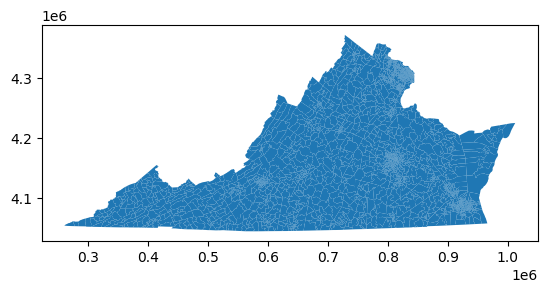

In [42]:
final_df.plot()

In [43]:
pop_vals = [final_df.loc[final_df["SEND"] == str(n), "TOTPOP"].sum() for n in range(1, 40)]
print(pop_vals)

[219235.0, 214436.0, 212257.0, 218193.0, 222004.0, 214980.0, 216978.0, 214167.0, 216232.0, 216008.0, 215828.0, 221938.0, 214104.0, 216341.0, 215796.0, 219989.0, 220422.0, 211841.0, 215153.0, 217758.0, 212429.0, 212176.0, 214318.0, 211184.0, 215473.0, 216759.0, 213387.0, 207731.0, 213356.0, 215184.0, 219355.0, 221709.0, 212800.0, 218522.0, 221142.0, 214354.0, 206985.0, 219012.0, 220426.0]


In [44]:
directory = "./VA"
if not os.path.exists(directory):
    os.makedirs(directory)
final_df.to_file("./VA/VA.shp")